In [14]:
from importlib import reload  
import numpy as np
import matplotlib.pyplot as plt
import pycraf
import cysgp4
from pycraf import conversions as cnv
from pycraf import protection, antenna, geometry
from astropy import units as u, constants as const
from scepter import skynet,obs
from astropy import coordinates as coord

In [19]:

###reload here
reload(skynet)
reload(obs)

min_elevation = 0 * u.deg
grid_size = 2. * u.deg
npoints=1 ##pointing per cell
skygrid = skynet.pointgen(niters=npoints,
    step_size=grid_size,
    lat_range=(min_elevation, 90 * u.deg),
    rnd_seed=0,
    )

tel_az, tel_el, grid_info = skygrid 
print('-' * 80)
print('Minimum elevation: {0:.2f}'.format(min_elevation))
print('Number of cells: {0:d}'.format(len(grid_info)))
print('-' * 80)
ncell=len(grid_info)
print(tel_az.shape)

--------------------------------------------------------------------------------
Minimum elevation: 0.00 deg
Number of cells: 5156
--------------------------------------------------------------------------------
(1, 5156)


In [20]:
deepfield_=(tel_az>20) * (tel_az<50) * (tel_el>50) *(tel_el<80)
deepfield_az=tel_az[deepfield_]+np.random.randn(np.sum(deepfield_))*2
deepfield_el=tel_el[deepfield_]+np.random.randn(np.sum(deepfield_))*2
print(deepfield_az.shape)

(93,)


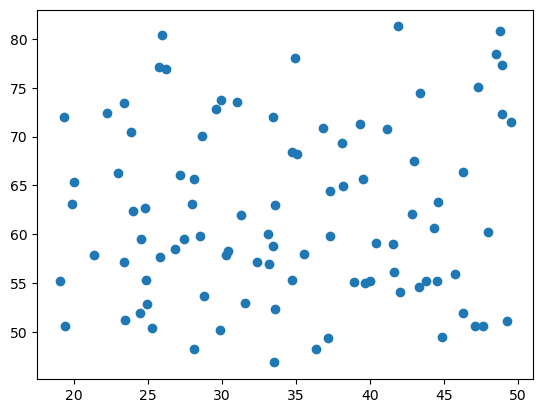

In [21]:
plt.scatter(deepfield_az,deepfield_el)

In [22]:
used_grid,used_grid_idx=skynet.gridmatch(deepfield_az,deepfield_el,grid_info)
gridvalues=np.empty(len(used_grid))
print(gridvalues.shape,used_grid_idx.shape)


(66,) (66, 93)


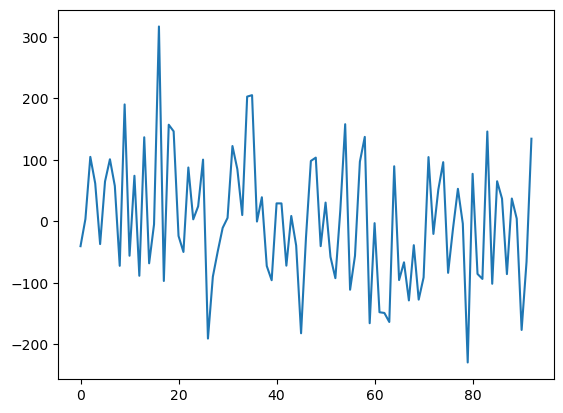

(66, 93) (93,)


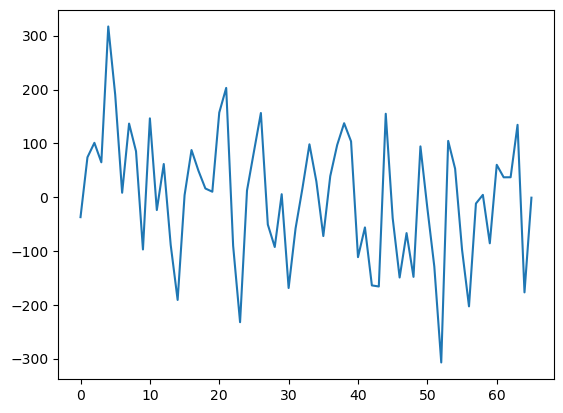

In [23]:


data=np.random.randn(len(deepfield_az))*100
plt.plot(data)
plt.show()
print(used_grid_idx.shape,data.shape)

for i in range(len(used_grid)):
    gridvalues[i]=np.sum(data[used_grid_idx[i]])
plt.plot(gridvalues)
plt.show()


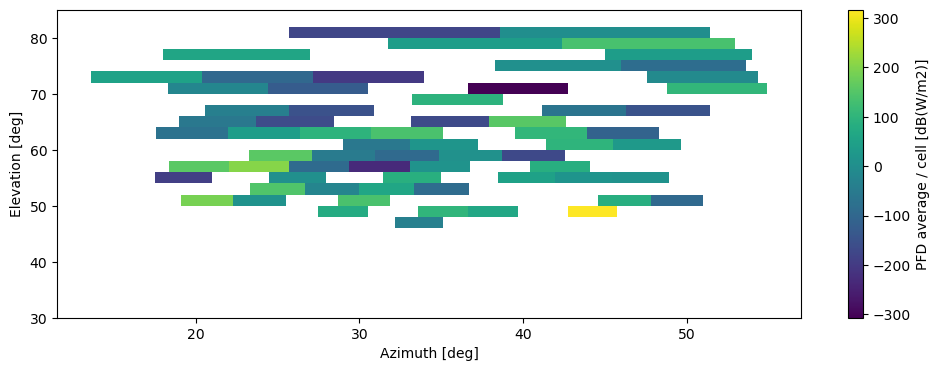

In [25]:
skynet.plotgrid(gridvalues,grid_info[used_grid])

(array([3840, 3842, 3847, 3961, 3963, 3964, 3964, 3965, 4069, 4070, 4070,
        4070, 4070, 4071, 4072, 4072, 4074, 4074, 4074, 4075, 4075, 4078,
        4177, 4178, 4178, 4182, 4183, 4184, 4281, 4281, 4281, 4283, 4283,
        4286, 4377, 4378, 4379, 4379, 4379, 4380, 4380, 4381, 4382, 4384,
        4469, 4470, 4470, 4472, 4474, 4475, 4476, 4557, 4560, 4561, 4638,
        4638, 4639, 4639, 4640, 4641, 4642, 4642, 4716, 4717, 4717, 4718,
        4718, 4784, 4786, 4847, 4849, 4851, 4851, 4851, 4852, 4852, 4853,
        4907, 4907, 4908, 4908, 4908, 4910, 4959, 4960, 4961, 4961, 4961,
        4963, 5009, 5048, 5079, 5080]),
 array([ 1, 13,  7,  5, 15, 16, 33,  8,  9,  0,  2, 10, 18, 12,  3,  4,  6,
        22, 23, 14, 32, 17, 27, 19, 20, 31, 24, 25, 28, 29, 43, 21, 30, 41,
        42, 35, 11, 37, 51, 46, 52, 39, 38, 49, 50, 26, 44, 36, 47, 55, 40,
        34, 53, 66, 57, 63, 45, 56, 58, 64, 54, 59, 65, 60, 74, 48, 61, 68,
        70, 77, 67, 69, 75, 89, 71, 81, 76, 62, 78, 73, 83, 84, 